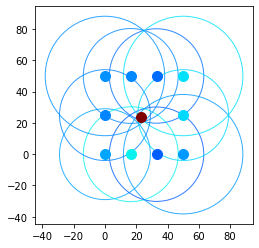

In [3]:
from src.utils.graph import create_circle
from src.utils.least_squares import *
from src.utils.graph import *
from src.model.point import Point
from src.model.circle import Circle

circles = [Circle(Point(0, 0, ), rssiToDistance(-72.5958)),
           Circle(Point(16.5, 0), rssiToDistance(-73.3073)),
           Circle(Point(33, 0), rssiToDistance(-73.2301)),
           Circle(Point(50, 0), rssiToDistance(-77.1108)),
           Circle(Point(0, 50), rssiToDistance(-77.1108)),
           Circle(Point(16.5, 50), rssiToDistance(-73.3082)),
           Circle(Point(33, 50), rssiToDistance(-73.231)),
           Circle(Point(50, 50), rssiToDistance(-77.1113)),
           Circle(Point(0, 25), rssiToDistance(-72.5948)),
           Circle(Point(50, 25), rssiToDistance(-72.5948))]

result_circl, results = leastSquares(circles)

create_circle(result_circl, target=True)

draw([circles[0], circles[1], circles[2], circles[3], circles[4], circles[5], circles[6], circles[7],
      circles[8], circles[9]])


In [2]:
results.x

array([ 2.00293252e+03,  1.99308048e+03, -9.09228996e+01,  1.83285601e+00])

In [3]:
#covar = (J^T J)^{-1}
import numpy as np
J = results.jac
JT = results.jac.transpose()



In [4]:
import pandas as pd


cov_matrix = pd.DataFrame((JT.dot(J))**-1)
cov_matrix

,0,1,2,3
0,4.166613e-08,-1.368951e-03,7.662466e-07,1.396179e-06
1,-1.368951e-03,4.166367e-08,1.160962e-06,-2.265394e-05
2,7.662466e-07,1.160962e-06,8.742616e-08,4.063453e-08
3,1.396179e-06,-2.265394e-05,4.063453e-08,1.683536e-08


In [5]:
cov_mat_xy = cov_matrix.drop([2,3], 1)
cov_mat_xy = cov_mat_xy.drop([2,3], 0)
cov_mat_xy

#http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/

,0,1
0,4.166613e-08,-1.368951e-03
1,-1.368951e-03,4.166367e-08


In [6]:
from numpy import linalg as LA

LA.eig(cov_mat_xy)

(array([ 0.00136899, -0.00136891]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))